# Simple Regression Example Using Neural Network

We are using neural network concept so solve the problem of linear regression and we expect our neural network to properly fit to the data

# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
np.random.seed(1)
tf.set_random_seed(1) #Setting Radnom seed to some fixed value so that everytime we run this we get same value.

# We are creating some random data for our neural network

Our Job is to find a line linearly fitting to the data.

In [3]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10) # creating Linear Data with Noise 
x_data

array([-0.24893399,  1.77208459,  0.72256535,  2.74033105,  3.38471212,
        4.33257134,  5.7254473 ,  7.31445996,  8.57919131, 10.1164502 ])

In [4]:
y_data = np.linspace(0,10,10) +np.random.uniform(-1.5,1.5,10)
y_data

array([-0.24241646,  1.66676961,  1.33557897,  4.46768564,  3.02660722,
        6.06695809,  6.41858107,  7.95384726,  7.8100497 ,  9.09430447])

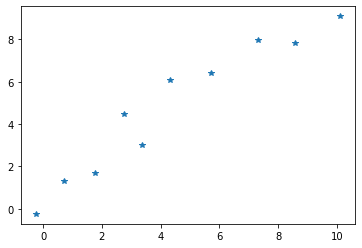

In [5]:
plt.plot(x_data, y_data, "*") #plotting actual data(training data)

# y = mx+b

We are creating two variables m and b. We will assign random value at the starting of the neural network.
Neural Network will be responsible to find appropiate vaules of m and b 

In [6]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

# Creating Cost Function for Optimisation of m and b

In [8]:
cost = 0 
for x,y in zip(x_data , y_data):
    
    y_hat = m*x +b       # predicted values of y given x_data 
    
    cost += (y-y_hat)**2  # **2 for punishing higher errors 

# Creating the optimizer, We are using Gradient Descent

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)

In [11]:
op = optimizer.minimize(cost)

# Initiating Variables

In [12]:
init = tf.global_variables_initializer()

# Creating Session

In [15]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        sess.run(op) #training the data using optimizer
        
    final_slope , final_intercept = sess.run([m,b])

# Creating Test Data

In [16]:
x_test = np.linspace(-1,11,10)

# Predecting y for test data

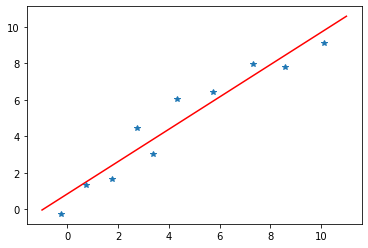

In [18]:
y_pred_plot = final_slope*x_test + final_intercept # Prediction on test data

#Plotting the Y values for test data and original Values
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data, y_data, "*")